In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
!pip install gdown

In [3]:
#collapse-output
import gdown

url = 'https://drive.google.com/file/d/1kBeVKUya96vO1l9IEz98Tl9lkqopcNUH/view?usp=sharing'
output_path = 'transection_join.csv'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1kBeVKUya96vO1l9IEz98Tl9lkqopcNUH
From (redirected): https://drive.google.com/uc?id=1kBeVKUya96vO1l9IEz98Tl9lkqopcNUH&confirm=t&uuid=9cdc4adb-ecc7-4ff1-b69e-2714886d5447
To: /content/transection_join.csv
100%|██████████| 625M/625M [00:09<00:00, 64.9MB/s]


'transection_join.csv'

In [22]:
store_sales = pd.read_csv('transection_join.csv')
store_sales.head(10)

,basket,date_time_of_transaction,upc,product_description,commodity,brand,product_size,store,store_zip_code,geography,household,units,dollar_sales,coupon
0,41610,1/22/1899 10:51:00 AM,4112907764,CLSCO ALFREDO ROAST GARLC,pasta sauce,Classico,16 OZ,354,42701,2,166772,2,5.38,0
1,41610,1/22/1899 10:51:00 AM,3620000482,RAGU HEARTY SAUT ON/MUSH,pasta sauce,Ragu,26.3 OZ,354,42701,2,166772,1,1.50,0
2,41610,1/22/1899 10:51:00 AM,3620000468,RAGU\HEARTY ONION/GARLIC,pasta sauce,Ragu,26 OZ,354,42701,2,166772,1,1.50,0
3,41610,1/22/1899 10:51:00 AM,9999985029,PRIVATE LABEL FETTUCCINI,pasta,Private Label,12 OZ,354,42701,2,166772,2,1.34,0
4,41611,1/22/1899 2:23:00 PM,3620000468,RAGU\HEARTY ONION/GARLIC,pasta sauce,Ragu,26 OZ,354,42701,2,93556,1,1.50,0
5,41611,1/22/1899 2:23:00 PM,3620000489,RAGU RBST ITALIAN MEAT,pasta sauce,Ragu,26 OZ,354,42701,2,93556,1,1.50,0
6,41612,1/22/1899 2:43:00 PM,9999985021,PRIVATE LABEL ELBO MACARONI,pasta,Private Label,16 OZ,354,42701,2,156699,1,0.67,0
7,41613,1/22/1899 3:45:00 PM,2700042238,HUNT TRADITIONAL SAUCE,pasta sauce,Hunt's,26.5 OZ,354,42701,2,139278,1,0.99,0
8,41614,1/22/1899 4:46:00 PM,7468309948,EMERILS PUTTANESCA SAUCE,pasta sauce,Emeril's,25 OZ,354,42701,2,130430,2,7.78,0
9,41614,1/22/1899 4:46:00 PM,2066200021,NEWMN OWN MARINARA W/MSHRM SCE,pasta sauce,Newman's,26 OZ,354,42701,2,130430,1,2.79,0


In [23]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   basket                    int64  
 1   date_time_of_transaction  object 
 2   upc                       int64  
 3   product_description       object 
 4   commodity                 object 
 5   brand                     object 
 6   product_size              object 
 7   store                     int64  
 8   store_zip_code            int64  
 9   geography                 int64  
 10  household                 int64  
 11  units                     int64  
 12  dollar_sales              float64
 13  coupon                    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 555.2+ MB


# Model (prophet)





In [5]:
store_sales['date'] = pd.to_datetime(store_sales['date_time_of_transaction'])

In [6]:
store_sales = store_sales[['date','dollar_sales']]

In [7]:
store_sales['date'] = store_sales['date'].dt.to_period('M')
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [8]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
monthly_sales

,date,dollar_sales
0,1899-01-01,394364.21
1,1899-02-01,342500.49
2,1899-03-01,390713.80
3,1899-04-01,365946.34
4,1899-05-01,390049.98
5,1899-06-01,398825.03
6,1899-07-01,435190.30
7,1899-08-01,378770.06
8,1899-09-01,344716.05
9,1899-10-01,346194.42


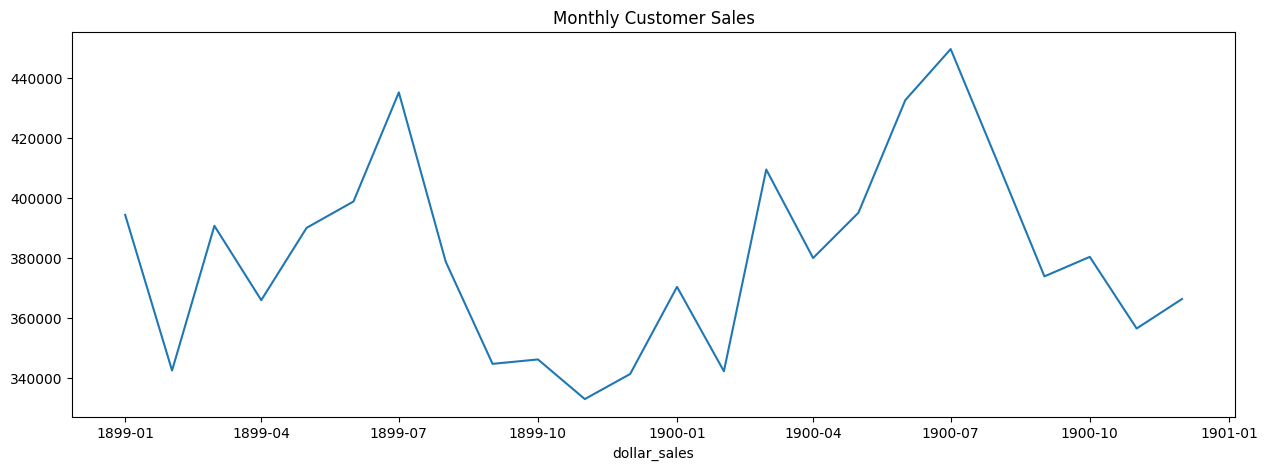

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['dollar_sales'])
plt.xlabel('Date')
plt.xlabel('dollar_sales')
plt.title("Monthly Customer Sales")
plt.show()

In [ ]:
#Rename the columns to 'ds' and 'y'
monthly_sales = monthly_sales.rename(columns={'date':'ds', 'dollar_sales':'y'})

In [ ]:
# pip install prophet
from prophet import Prophet
# creating the prophet model object
model = Prophet()
# fitting the data
model.fit(monthly_sales)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7z9ajvss/3nysdriw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7z9ajvss/yxrkpkbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78210', 'data', 'file=/tmp/tmp7z9ajvss/3nysdriw.json', 'init=/tmp/tmp7z9ajvss/yxrkpkbl.json', 'output', 'file=/tmp/tmp7z9ajvss/prophet_modelve9hmbud/prophet_model-20240911173444.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:34:44 - cmdstanpy - INFO - Chain [1] start processing
I

In [ ]:
future_dates = model.make_future_dataframe(periods=365*2, freq='D')

In [ ]:
forecast = model.predict(future_dates)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 640x480 with 0 Axes>

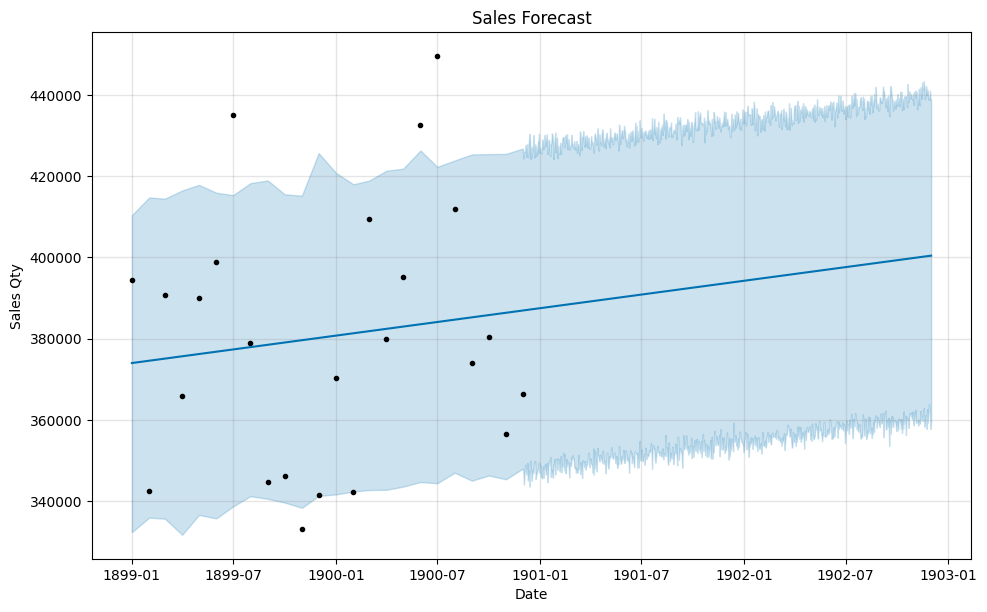

In [ ]:
# Plot the forecasted sales
import matplotlib.pyplot as plt
plt.figure()
model.plot(forecast, xlabel='Date', ylabel='Sales Qty')
plt.title('Sales Forecast')
plt.show()

# Model (XGBoost)

In [37]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [7]:
store_sales.shape

(5197681, 14)

In [24]:
store_sales.isnull().sum()

,0
basket,0
date_time_of_transaction,0
upc,0
product_description,0
commodity,0
brand,0
product_size,43596
store,0
store_zip_code,0
geography,0


In [25]:
# prompt: drop colum product_size

store_sales = store_sales.drop('product_size', axis=1)


In [14]:
store_sales.describe()

,units,dollar_sales
count,5.197681e+06,5.197681e+06
mean,1.196616e+00,1.756568e+00
std,5.686024e-01,1.128989e+00
min,1.000000e+00,-1.176000e+01
25%,1.000000e+00,9.900000e-01
50%,1.000000e+00,1.500000e+00
75%,1.000000e+00,2.190000e+00
max,1.560000e+02,1.531400e+02


In [17]:
sns.set()

In [26]:
# prompt: keep only month and year in date_time_of_transaction

import pandas as pd
store_sales['date_time_of_transaction'] = pd.to_datetime(store_sales['date_time_of_transaction'])
store_sales['date_time_of_transaction'] = store_sales['date_time_of_transaction'].dt.strftime('%Y-%m')


In [27]:
store_sales.head(10)

,basket,date_time_of_transaction,upc,product_description,commodity,brand,store,store_zip_code,geography,household,units,dollar_sales,coupon
0,41610,1899-01,4112907764,CLSCO ALFREDO ROAST GARLC,pasta sauce,Classico,354,42701,2,166772,2,5.38,0
1,41610,1899-01,3620000482,RAGU HEARTY SAUT ON/MUSH,pasta sauce,Ragu,354,42701,2,166772,1,1.50,0
2,41610,1899-01,3620000468,RAGU\HEARTY ONION/GARLIC,pasta sauce,Ragu,354,42701,2,166772,1,1.50,0
3,41610,1899-01,9999985029,PRIVATE LABEL FETTUCCINI,pasta,Private Label,354,42701,2,166772,2,1.34,0
4,41611,1899-01,3620000468,RAGU\HEARTY ONION/GARLIC,pasta sauce,Ragu,354,42701,2,93556,1,1.50,0
5,41611,1899-01,3620000489,RAGU RBST ITALIAN MEAT,pasta sauce,Ragu,354,42701,2,93556,1,1.50,0
6,41612,1899-01,9999985021,PRIVATE LABEL ELBO MACARONI,pasta,Private Label,354,42701,2,156699,1,0.67,0
7,41613,1899-01,2700042238,HUNT TRADITIONAL SAUCE,pasta sauce,Hunt's,354,42701,2,139278,1,0.99,0
8,41614,1899-01,7468309948,EMERILS PUTTANESCA SAUCE,pasta sauce,Emeril's,354,42701,2,130430,2,7.78,0
9,41614,1899-01,2066200021,NEWMN OWN MARINARA W/MSHRM SCE,pasta sauce,Newman's,354,42701,2,130430,1,2.79,0


In [28]:
encoder = LabelEncoder()

In [32]:
store_sales['product_description'] = encoder.fit_transform(store_sales['product_description'])
store_sales['commodity'] = encoder.fit_transform(store_sales['commodity'])
store_sales['brand'] = encoder.fit_transform(store_sales['brand'])
store_sales['date_time_of_transaction'] = encoder.fit_transform(store_sales['date_time_of_transaction'])

In [33]:
X = store_sales.drop(columns='units', axis=1)
Y = store_sales['units']

In [34]:
print(X)

          basket  date_time_of_transaction         upc  product_description  \
0          41610                         0  4112907764                  170   
1          41610                         0  3620000482                  726   
2          41610                         0  3620000468                  755   
3          41610                         0  9999985029                  630   
4          41611                         0  3620000468                  755   
...          ...                       ...         ...                  ...   
5197676  3075770                        22  4112927445                  172   
5197677  3075771                        22  9999981142                  668   
5197678  3075774                        22  2409427041                  274   
5197679  3075768                        22  7680851697                   86   
5197680  3075775                        22  7680851697                   86   

         commodity  brand  store  store_zip_code  g

In [35]:
print(Y)

0          2
1          1
2          1
3          2
4          1
          ..
5197676    1
5197677    1
5197678    1
5197679    1
5197680    1
Name: units, Length: 5197681, dtype: int64


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(5197681, 12) (4158144, 12) (1039537, 12)


In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [43]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [44]:
print('R square value = ', r2_train)

R square value =  0.8602291054816158


In [45]:
# Prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [46]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [47]:
print('R square value = ', r2_test)

R square value =  0.8491199763013538
